In [42]:
import warnings
warnings.filterwarnings("ignore")


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
dataset=pd.read_csv(r"D:\Different Data\Machine Learning\Angrew\Logesic regression\Predicting Student Admission\dataset_admissions.csv")
dataset.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [45]:
dataset.shape

(400, 4)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [47]:
dataset.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [48]:
dataset.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [49]:
dataset.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [50]:
#The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.


pd.crosstab(dataset["admit"],dataset["rank"],rownames=["admitted"])

rank,1,2,3,4
admitted,,,,
0,28,97,93,55
1,33,54,28,12


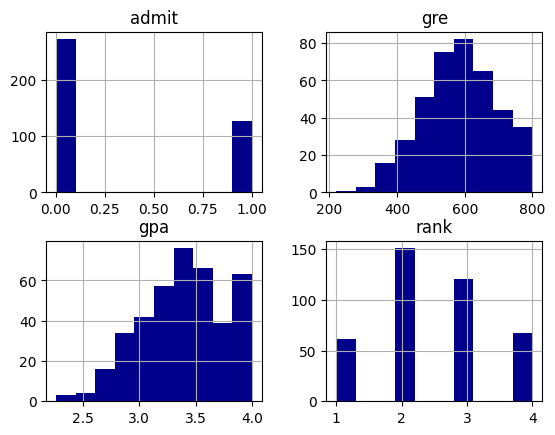

In [51]:
dataset.hist(color="darkblue")
plt.show()

In [52]:
dummy_rank = pd.get_dummies(dataset['rank'],prefix="rank").astype(int) 
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [53]:
columns_to_keep=["admit","gre","gpa"]
dataset=dataset[columns_to_keep].join(dummy_rank[["rank_1","rank_2","rank_3","rank_4"]])
dataset.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [54]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver="liblinear")

In [57]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [58]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

Accuracy

In [59]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y_pred,y_test)
accuracy

1.0

Precision

In [60]:
precision=metrics.precision_score(y_test,y_pred)
precision

1.0

Recall

In [61]:
recall=metrics.recall_score(y_test,y_pred)
recall

1.0

Confusion Matrix

In [62]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[67,  0],
       [ 0, 13]], dtype=int64)

<Axes: >

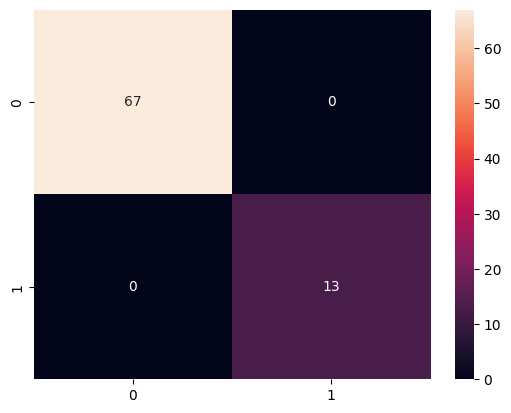

In [63]:
sns.heatmap(confusion_matrix,annot=True)

AUC_ROC cure

In [64]:
auc=metrics.roc_auc_score(y_test,y_pred)
auc

1.0

K-Fold

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5,shuffle=True)
cv_r=cross_val_score(model,x,y,cv=kf)
np.mean(cv_r)

1.0